
# Project: No-show Appointments data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
        <li><a href="#wrangling">Geneal Properties</a></li>
        <li><a href="#wrangling">Data Cleansing</a></li>   
<li><a href="#eda">Exploratory Data Analysis</a></li>
        <li><a href="#wrangling">Research Question 1</a></li>
        <li><a href="#wrangling">Research Question 2</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This is paper is the data analysis about "no-show appoints". The database was established based on over 100,000 medical appointments in Brazil. The data was collected based on whether those patients have showed up or not showed up on thier appointment time. The database also includes various informations about those patients. The database contains'Patient id', 'Appointment id', 'Gender', 'Schedule Day', 'Appointment Day', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Achololism', 'Handcap', 'SMS_recieved' and 'No-show' regarding each patients. The main focus of this analysis paper is "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?". In other word, the dependent variable for this paper is patient show/ no-show and two independent variables are gender and scholarship. 

### Questions
>The main question of this reseach is "What factors are important for us to know in order to predict if a paitents will show up for their scheduled appointmet?". In this analysis, I will examine two factors which seems to be powerful in predicting the show-up. First, "Is patient going to be older or younger who does not show up at the appointment?". In other words, would the age matter on the showing-up at the appointment. Second, "Do patients who enrolled in Brasilian welfare program Bolsa Família would show up at their appointment?". In other words, enrollment in Brasilian welfare program Bolsa Família may defer patients from showing up at their appointment time. This analysis will be processes based on these two research questions. 

>1) How is age affecting patients absence?

>2) Do patients who enrolled in Brasilian welfare program Bolsa Família would show up at their appointment?

>3) How can we predict the no show appointment given paitents' information?

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [67]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The last column 'No_show'; "Yes" refer patient did not showed up and "No" refer patient showed up. (I have change the naem of the column for the last one from "No-show" to "No-Show" because I underwent some problems with the naming in the future process.)

In [68]:
df.shape

(110527, 14)

The database consists of 110527 patients and 14 types of information for each patients.

In [69]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


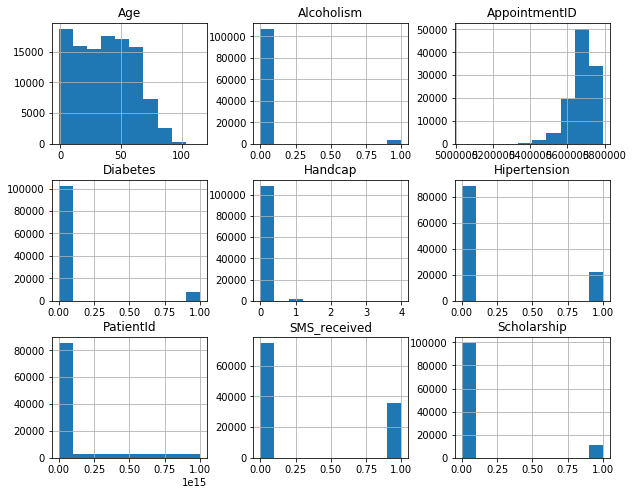

In [71]:
df.hist(figsize=(10,8));

### Data Cleaning

In [72]:
df.drop(['ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis=1, inplace=True)

I have cleaned some columns and only keep the columns which I need.

In [73]:
df.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,SMS_received,No_show
0,2.987250e+13,5642903,F,62,0,0,No
1,5.589980e+14,5642503,M,56,0,0,No
2,4.262960e+12,5642549,F,62,0,0,No
3,8.679510e+11,5642828,F,8,0,0,No
4,8.841190e+12,5642494,F,56,0,0,No


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
PatientId        110527 non-null float64
AppointmentID    110527 non-null int64
Gender           110527 non-null object
Age              110527 non-null int64
Scholarship      110527 non-null int64
SMS_received     110527 non-null int64
No_show          110527 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 5.9+ MB


There are no missing data for each column.

In [75]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000


Observing this description everthing seems okay however, in the 'Age' column, the minimum amount is printed '-1'. '-1' age is impossible. So I have looked into raw data and there was only one '-1' so I have decided to eliminate that within the raw data.

In [80]:
print(df.loc[[99832]])

          PatientId  AppointmentID Gender  Age  Scholarship  SMS_received  \
99832  4.659430e+14        5775010      F   -1            0             0   

      No_show  
99832      No  


In [7]:
df.drop(df.index[99832], axis=0, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,SMS_received,No_show
0,2.987250e+13,5642903,F,62,0,0,No
1,5.589980e+14,5642503,M,56,0,0,No
2,4.262960e+12,5642549,F,62,0,0,No
3,8.679510e+11,5642828,F,8,0,0,No
4,8.841190e+12,5642494,F,56,0,0,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 7 columns):
PatientId        110526 non-null float64
AppointmentID    110526 non-null int64
Gender           110526 non-null object
Age              110526 non-null int64
Scholarship      110526 non-null int64
SMS_received     110526 non-null int64
No_show          110526 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 6.7+ MB


In [65]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,SMS_received
count,1.105250e+05,1.105250e+05,110525.000000,110525.000000,110525.000000
mean,1.474945e+14,5.675303e+06,37.089545,0.098267,0.321031
std,2.560952e+14,7.129515e+04,23.109875,0.297677,0.466875
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000
25%,4.172460e+12,5.640285e+06,18.000000,0.000000,0.000000
50%,3.173180e+13,5.680571e+06,37.000000,0.000000,0.000000
75%,9.438960e+13,5.725522e+06,55.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000


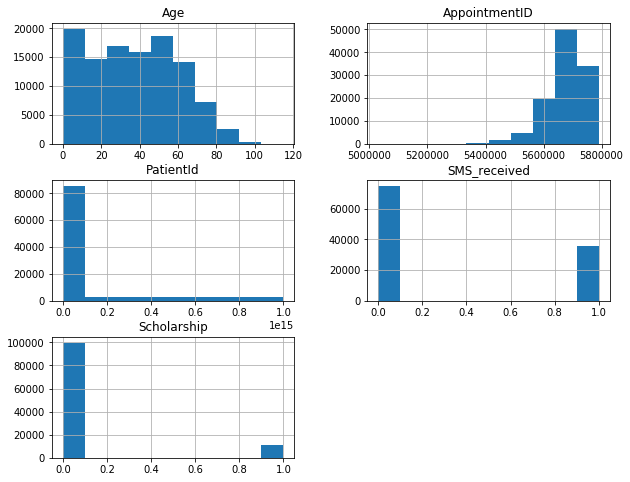

In [66]:
df.hist(figsize=(10,8));

In [9]:
df['No_show'] = df['No_show'].map({'Yes':1, 'No':0})

I have changed the presentation type of 'no-show' column for convienence. 

In [10]:
df.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,SMS_received,No_show
0,2.987250e+13,5642903,F,62,0,0,0
1,5.589980e+14,5642503,M,56,0,0,0
2,4.262960e+12,5642549,F,62,0,0,0
3,8.679510e+11,5642828,F,8,0,0,0
4,8.841190e+12,5642494,F,56,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

>"What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?" is the main focus of this paper. I am going to focus on three independent variables, age, scholarship and gender, which can be used to predict paitents to show up. I am going to observe the relationships of those variables one by one. 

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Is patient going to be older or younger who does not show up at the appointment?

In [12]:
no_show = df.No_show == True
show = df.No_show == False

I have create a new function. This function makes me easier to find who is in certain age. For example, if I want to know which paitents are in the mean age.

In [132]:
def p(Age):
    print(df.loc[["Age=", Age]])
    return;


In [13]:
df.Age[no_show].mean()

34.31766656212196

Who are in the mean age of among 'no show' paitents?

In [133]:
p(34)

         PatientId  AppointmentID Gender   Age  Scholarship  SMS_received  \
Age=           NaN            NaN    NaN   NaN          NaN           NaN   
34    1.999980e+13      5637963.0      F  79.0          0.0           0.0   

     No_show  
Age=     NaN  
34        No  


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


There are only one person who are aged of 34 (the mean age of no-show paitents).

In [14]:
df.Age[show].mean()

37.790504154999034

Who are in the mean age of among 'show' paients?

In [134]:
p(38)

         PatientId  AppointmentID Gender   Age  Scholarship  SMS_received  \
Age=           NaN            NaN    NaN   NaN          NaN           NaN   
38    5.873320e+12      5609446.0      M  85.0          0.0           1.0   

     No_show  
Age=     NaN  
38        No  


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


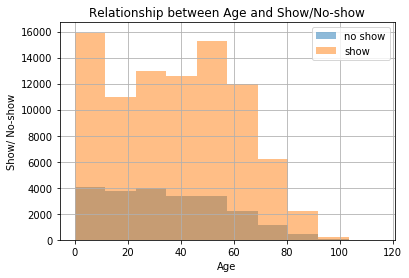

In [18]:
df.Age[no_show].hist(alpha=0.5, label='no show')
df.Age[show].hist(alpha=0.5, label='show')
plt.legend();
plt.title("Relationship between Age and Show/No-show")
plt.xlabel("Age")
plt.ylabel("Show/ No-show")
plt.grid(True)
plt.show()


There are not big difference between age among patients who showed up and not showed up. However, it seems that mean age of patients who showed up are approximately 3.5 years older. 

### Research Question 2  Do patients who enrolled in Brasilian welfare program Bolsa Família would show up at their appointment?

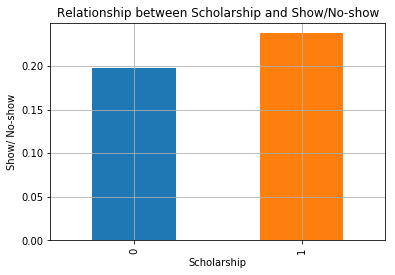

In [16]:
df.groupby('Scholarship').No_show.mean().plot(kind='bar');
plt.title("Relationship between Scholarship and Show/No-show")
plt.xlabel("Scholarship")
plt.ylabel("Show/ No-show")
plt.grid(True)
plt.show()

'Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
This shows that the patients who are enrolled in Bolsa Família program, they are more likely not to show up at the appointment. Because, '1' refers 'no show' and '0' refers 'show'.

<a id='conclusions'></a>
## Conclusions

In conclusion, for two factor, the age and scholarship, did not show strong relationship between the no-show or show. However, we can predict that there are more possibility that the older the patient is and patient who are not enrolled in the welfare program are more likely to attend the appointment than other patients in opposite situation. 

There are some limiation in the analysis. I was not able to find strong factors for predicting the no-show which had strong correlation. And in the 'Neighbour' column, the characters were written in another languages which made me caanot handle that data.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [135]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0